# Part Two

У другій частині попереднього домашнього завдання ми вирішували диференціальні рівняння та будували графіки. Продовжуємо працювати над цією домашньою роботою далі.

Необхідно методом найменших квадратів:

- для набору даних графіка функції S(t) отримати рівняння виду ``S(t) = S0 * e**(−αt)``
- для набору даних графіка функції I(t) отримати рівняння виду ``I(t) = (I0 + αS0t) * e**(−αt)``

Для рівняння R(t) графік функції буде ``R(t) = N − S(t) − I(t)``.

Побудувати всі три графіки S(t), I(t) і R(t) на одній області відображення, отримані методом найменших квадратів

Знайти час ``t_max``, за якого кількість інфекційних індивідів максимальна. Потрібно за допомогою методу ``minimize_scalar`` знайти, коли функція I(t) досягає свого максимуму.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.integrate import solve_ivp
from scipy.optimize import leastsq, minimize_scalar
from scipy.interpolate import interp1d

In [2]:
alpha = 0.5
beta = 0.3
N = 1000000
S_0 = 990000
I_0 = 7000
R_0 = 3000
t_0, t_f = 0, 25

In [3]:
def S_target_func(t, alpha):
    return S_0 * np.exp(-alpha * t)


def diff_S(p, y, t):
    p = p[0]
    return y - S_target_func(t, p)

In [4]:
t = np.linspace(t_0, t_f, 1000)
y_S = np.array(S_target_func(t, alpha))
p = (0.5,)

aprx1, _ = leastsq(diff_S, p, args=(y_S, t))

In [5]:
print(aprx1)

[0.5]


In [6]:
y_S_aprx = np.array(S_target_func(t, aprx1))

In [7]:
def I_target_func(t, alpha):
    return (I_0 + alpha * S_0 * t) * np.exp(-alpha * t)


def diff_I(p, y, t):
    p = p[0]
    return y - I_target_func(t, p)

In [8]:
y_I = np.array(I_target_func(t, alpha))

aprx2, _ = leastsq(diff_I, p, args=(y_I, t))

In [9]:
print(aprx2)

[0.5]


In [10]:
y_I_aprx = np.array(I_target_func(t, aprx2))

In [11]:
def R_target_func(y1, y2):
    return N - y1 - y2

In [12]:
y_R = np.array(R_target_func(y_S, y_I))
y_R_aprx = np.array(R_target_func(y_S_aprx, y_I_aprx))

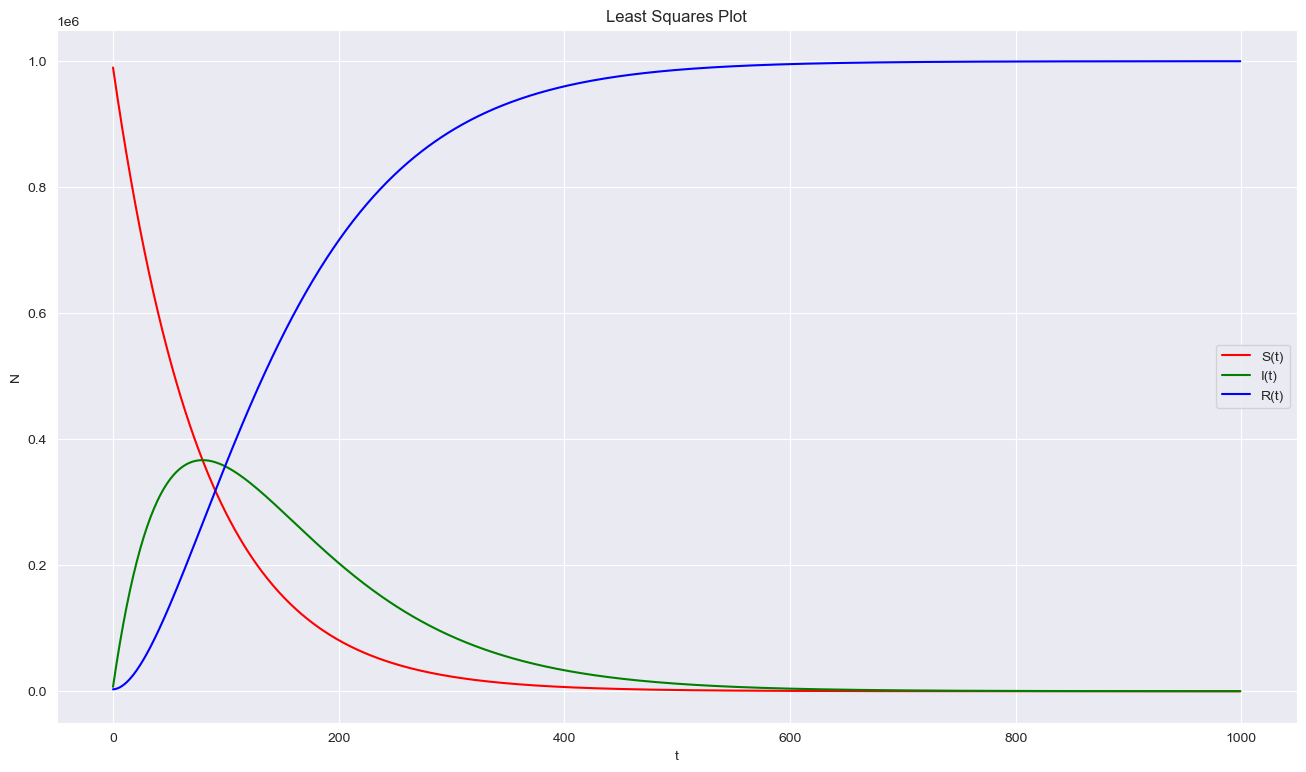

In [13]:
plt.figure(figsize=(16, 9))
sns.set_style('darkgrid')
sns.lineplot(y_S_aprx, color='red', legend='brief', label='S(t)')
sns.lineplot(y_I_aprx, color='green', legend='brief', label='I(t)')
sns.lineplot(y_R_aprx, color='blue', legend='brief', label='R(t)')

plt.title('Least Squares Plot')
plt.ylabel('N')
plt.xlabel('t');

In [14]:
max_infected = minimize_scalar(lambda t, alpha: -I_target_func(t, alpha), bracket=(0,5), args=(aprx2,))

t_max = np.round(max_infected['x'][0], 3)
y_inf = np.round(I_target_func(t_max, aprx2[0]), 3)
print(f'The time at which there is a maximum number of infected people is: {t_max}')

The time at which there is a maximum number of infected people is: 1.986
